In [15]:
import requests
import json
from contextlib import closing
# make base URL and dictionary of get request key/values
url = "https://content.guardianapis.com/search"
payload = {'api-key': "6ff8fcd2-050d-4801-a29f-848c8b750b6e", 'q':'Brexit', 'show-blocks':'body', 
           'page-size': 200, 'show-tags': 'contributor'} # key/values for get request (look up in api, there are lots)

# Perform the actual request
with closing(requests.get(url,params=payload)) as r:
    articles = r.json()
#     print(articles)
summaries = [x['blocks']['body'][0]['bodyTextSummary'] for x in articles['response']['results'] if x['tags']]
# print(summaries)
# summaries = [x['blocks']['body'][0]['bodyTextSummary'] for x in articles['response']['results']]
# print(len(summaries))
# # print(len([word for document in summaries for word in summaries[0].split()]))
words = [word for document in summaries for word in document.split()]
print(summaries)
print(len(summaries))

['European Union exit and trade (European affairs) sub-committee PM I went to Brussels. Met the EU leaders. They wanted to know our plan. I had nothing to tell them. Foreign secretary Rome wasn’t built in a day. PM We need a plan. The EU wants to know the plan. Parliament wants to know the plan. It has been four frigging months! No plan! I’m beginning to wonder if this will be over in my lifetime. Foreign secretary Probably not. How old are you, actually? PM You three ran the leave campaign. I assumed you had some idea what to do. Foreign secretary Nope. Trade minister The Great Repeal bill will solve the problem. PM No. EU-related law constitutes more than one-sixth of our statutes. I’m told there are 12,295 EU regulations concerning consumer and banking rules and food-safety standards. The bill will simply transfer all those EU rules into UK law. Then we still have to\xa0get rid of them, one by one. Brexit minister Independence! Sovereignty! Freedom! Chancellor Recession! Foreign sec

## Dataset Overview

We are using articles from theguardian.com, a British news and media website.  Specifically, we are extracting the body of articles from the paper's API. These results will contain articles from their newspapers, "The Guardian" and "The Observer", as well as their additional online content. Thus, our data is a collection of words from our query results.

We are querying theguardian.com because we are interested in web content and how certain text can affect views. Views mean ad revenue for these content  This is important as online content continues to grow, content creators need any advantage they can get. 

One thing we want to analyze is the frequency of certain words and where they fit on a grade level. We want to see if our dataset contains more words for higher or lower literacy readers. According to the Nielson Group, 30% of web users have lower literacy, which is reading around an 8th grade level. Based on word frequencies, we can see if changing word frequencies could allow for a different range of audience.

Another item we want to analyze is frequency of words and relate them to certain tags. For example, The Guardian API has a tag for "star-rating" which would allow us to see what words appear in popular and unpopular items.  This could help us determine if based on certain words if an article will be popular. We can also find relationships between word frequency and article contributors, production-office, and section. We could determine based on word frequencies if an article will contain a certain tag.


[10 points] Read in your document data as strings.
Rupal

[15 points] Verify data quality: remove words from the vocabulary that are not relevant or that you think should not be included. Alternatively, choose a specific vocabulary to choose for your data. 
Omar

http://www.ranks.nl/stopwords - possible stop words?

http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

with open("combined_stop_words.txt") as textfile:
    stopwords = textfile.readlines()
    
print(stopwords)

stopwords = [word.strip() for word in content] 
print(stopwords)

In [16]:
# combined stop words from scikit-Learn's original source and 2 others, for 617 stop words
# https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/feature_extraction/stop_words.py
# https://sites.google.com/site/kevinbouge/stopwords-lists
# http://algs4.cs.princeton.edu/35applications/stopwords.txt
with open("combined_stop_words.txt") as textfile:
    stopwords = textfile.readlines()
stopwords = [word.strip() for word in stopwords] 

[10 points] Convert the data from raw text into a sparse encoded bag-of-words representation.   
Rupal

[10 points] Convert the data into a sparse encoded tf-idf representation.
Omar

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vect = TfidfVectorizer(stop_words=stopwords)

# tfidf_vect = TfidfVectorizer() 
tfidf_mat = tfidf_vect.fit_transform(summaries) 

# convert to pandas to get better idea about the data
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
df

,000,02,09,10,100,100m,101,104,105bn,106,...,zeichner,zilch,zimbabwe,zloty,zombie,zone,zones,zoo,zurich,óglaigh
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,...,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0
1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,...,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0
2,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,...,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0
3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,...,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0
4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,...,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0
5,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,...,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0
6,0.000000,0.0,0.000000,0.014929,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,...,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0
7,0.067490,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,...,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0
8,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,...,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0
9,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,...,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0


In [18]:
# largest tfidf values
df.max().sort_values()[-10:]

police        0.564414
ambassador    0.577418
passport      0.583664
border        0.606026
horses        0.607046
beer          0.645684
startups      0.694576
nuclear       0.732208
christie      0.739201
hannan        0.864668
dtype: float64

In [19]:
# smallest tfidf values
df.max().sort_values()[:10]

climactic    0.007721
spry         0.007721
aquiline     0.007721
bonding      0.007721
dustbin      0.007721
staffed      0.007721
staffers     0.007721
stagers      0.007721
arcane       0.007721
arch         0.007721
dtype: float64

In [20]:
tfidf_vect.vocabulary_

{'volkswagen': 10650,
 'bread': 1374,
 'bas': 1053,
 'banned': 1023,
 'invented': 5363,
 'register': 8101,
 'briefly': 1417,
 'devised': 2912,
 'heckler': 4726,
 'metaphors': 6281,
 'merge': 6266,
 'relying': 8184,
 'trousers': 10196,
 'relaunch': 8154,
 'technically': 9825,
 'patchwork': 7081,
 'website': 10767,
 'everyday': 3661,
 'horatius': 4874,
 'pollinators': 7385,
 'surrounding': 9678,
 'beers': 1108,
 'substances': 9574,
 'enda': 3470,
 'seam': 8758,
 'captain': 1602,
 'persuasive': 7190,
 'prepared': 7520,
 'regiment': 8095,
 'contemplating': 2275,
 'targets': 9798,
 'afforded': 500,
 'catching': 1662,
 'delegitimise': 2740,
 'heavily': 4724,
 'eclipsed': 3324,
 'constraints': 2250,
 'increase': 5130,
 'straws': 9482,
 'light': 5837,
 'briefings': 1416,
 'screeds': 8736,
 'kanneganti': 5557,
 'characterised': 1754,
 '400': 194,
 'stayed': 9394,
 'pose': 7420,
 'obstfeld': 6764,
 'idiots': 4989,
 'victims': 10602,
 'turmoil': 10228,
 'spends': 9257,
 'today': 10010,
 'flesh': 

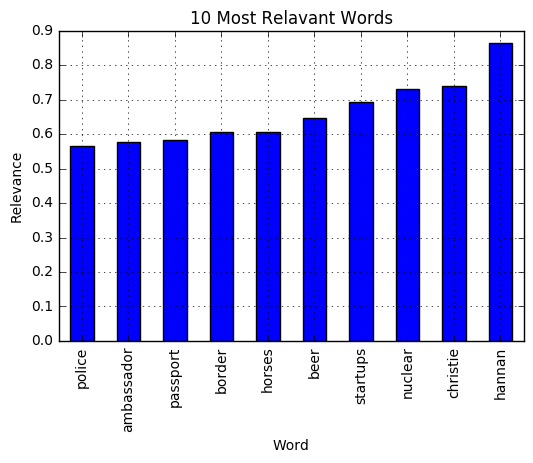

In [32]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 
# could also say "%matplotlib notebook" here to make things interactive

df_top_10_tfidf = df.max().sort_values()[-10:]
axis = df_top_10_tfidf.plot(kind='bar', title="10 Most Relavant Words", grid=True)
axis.set_xlabel("Word")
axis.set_ylabel("Relevance")

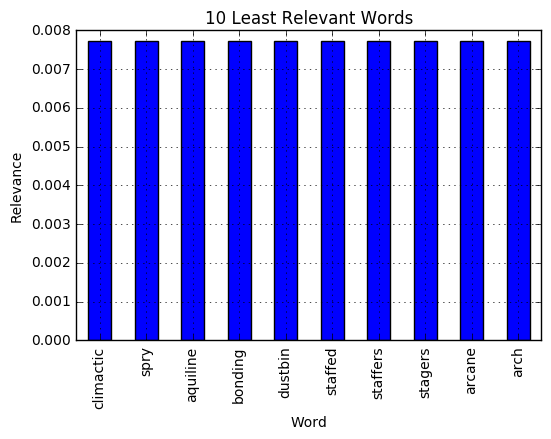

In [30]:
df_bottom_10_tfidf = df.max().sort_values()[:10]
axis = df_bottom_10_tfidf.plot(kind='bar', title="10 Least Relevant Words", grid=True)
axis.set_xlabel("Word")
axis.set_ylabel("Relevance")

[20 points] Visualize statistical summaries of the text data such as word frequencies, document lengths, most relevant words, vocabulary size, etc. Choose visualizations that you think summarize your data best.
Rupal : word freq, doc length
and Omar: most relevant words, vocab size

[15 points] For each target class, visualize the most common relevant words and word frequencies. Are there any prevalent differences between your target classes? 
Rupal

  Exceptional Work (10 points total)
You have free reign to provide any additional analyses. 
One idea: create a word cloud of the most commonly used relevant words in your data. 